In [80]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
df = pd.read_csv('amazon_alexa.csv', sep=";", date_parser=1)

In [82]:
df = df.iloc[:, 0:5]

In [83]:
date_counted = df.value_counts('date').head(10)

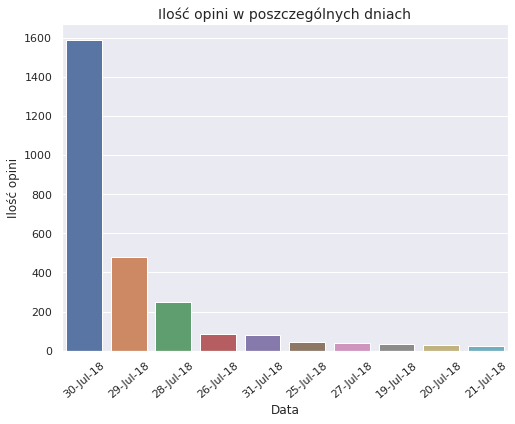

In [84]:
sns.set(rc={'figure.figsize': (8,6)})

sns.barplot(x=date_counted.index, y=date_counted)
plt.xlabel("Data", fontsize=12)
plt.ylabel("Ilość opini", fontsize=12)
plt.title("Ilość opini w poszczególnych dniach", fontsize=14)
plt.xticks(rotation=40)
plt.show()

In [85]:
selected_month = df.value_counts('date').head(10).index

In [86]:
df[df['date'] == '30-Jul-18']

,rating,date,variation,verified_reviews,feedback
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1
10,5,30-Jul-18,Charcoal Fabric,"I sent it to my 85 year old Dad, and he talks ...",1
11,5,30-Jul-18,Charcoal Fabric,I love it! Learning knew things with it eveyda...,1
12,5,30-Jul-18,Oak Finish,I purchased this for my mother who is having k...,1
...,...,...,...,...,...
3120,5,30-Jul-18,Black Dot,love it,1
3121,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3122,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3123,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1


## Data cleaning 1st turn

In [87]:
corpus = {}

for x in selected_month:
    corpus[x] = ". ".join(df[df['date'] == x]['verified_reviews'])

In [88]:
import re

for x in selected_month:
    corpus[x] = re.sub('[\#\\\/\&\:\)]', '', corpus[x])
    corpus[x] = re.sub('[0-9]+', '', corpus[x])
    corpus[x] = re.sub('\.\.\.', ' ', corpus[x])
    corpus[x] = re.sub('\.\.', '.', corpus[x])

In [89]:
corpus['30-Jul-18']

'looks great. Love it! I’ve listened to songs I haven’t heard since childhood! I get the news, weather, information! It’s great!. I sent it to my  year old Dad, and he talks to it constantly. I love it! Learning knew things with it eveyday! Still figuring out how everything works but so far it\'s been easy to use and understand. She does make me laugh at times. I purchased this for my mother who is having knee problems now, to give her something to do while trying to over come not getting around so fast like she did.She enjoys all the little and big things it can do Alexa play this song, What time is it and where, and how to cook this and that!. Love, Love, Love!!. Just what I expected . I love it, wife hates it. Really happy with this purchase.  Great speaker and easy to set up. We have only been using Alexa for a couple of days and are having a lot of fun with our new toy. It like having a new household member! We are trying to learn all the different featues and benefits that come w

In [90]:
import string

for x in selected_month:
    corpus[x] = re.sub('\[\/\"\(]', "", corpus[x])
    corpus[x] = re.sub('[%s]' % re.escape(string.punctuation.replace(".", "")), '', corpus[x])

## Data cleaning 2nd turn

In [91]:
corpus['30-Jul-18']

'looks great. Love it I’ve listened to songs I haven’t heard since childhood I get the news weather information It’s great. I sent it to my  year old Dad and he talks to it constantly. I love it Learning knew things with it eveyday Still figuring out how everything works but so far its been easy to use and understand. She does make me laugh at times. I purchased this for my mother who is having knee problems now to give her something to do while trying to over come not getting around so fast like she did.She enjoys all the little and big things it can do Alexa play this song What time is it and where and how to cook this and that. Love Love Love. Just what I expected . I love it wife hates it. Really happy with this purchase.  Great speaker and easy to set up. We have only been using Alexa for a couple of days and are having a lot of fun with our new toy. It like having a new household member We are trying to learn all the different featues and benefits that come with it. We love the s

In [92]:
data_clean = pd.DataFrame(corpus, index=[1,]).transpose()

In [93]:
data_clean.columns = ['reviews',]

In [94]:
cv = CountVectorizer(stop_words='english')
dtm = cv.fit_transform(data_clean.reviews)

In [95]:
dtm_df = pd.DataFrame(dtm.toarray(), columns=cv.get_feature_names())
dtm_df.index = data_clean.index

/home/felipe/ML/lib64/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [96]:
dtm_df

,abay,abc,abd,abilities,ability,able,abode,absolutely,ac,accent,...,youtubes,yr,yrs,yup,zero,zigbee,zonkedout,zwave,zzzzzzz,útil
30-Jul-18,0,1,1,3,8,66,0,14,1,7,...,0,2,2,0,0,0,0,0,0,0
29-Jul-18,1,0,0,0,7,17,2,10,2,0,...,0,0,0,0,1,1,0,1,0,0
28-Jul-18,0,0,0,0,3,6,0,3,0,0,...,1,0,0,1,0,0,0,0,0,1
26-Jul-18,0,0,0,0,1,2,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
31-Jul-18,0,0,0,0,0,4,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
25-Jul-18,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27-Jul-18,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
19-Jul-18,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
20-Jul-18,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
21-Jul-18,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Top Words

In [97]:
tdm_df = dtm_df.transpose()

In [98]:
top_dict = {}
for c in tdm_df.columns:
    top = tdm_df[c].sort_values(ascending=False).head(20)
    top_dict[c] = list(zip(top.index, top.values))
    
top_dict['30-Jul-18']

[('love', 503),
 ('echo', 343),
 ('great', 336),
 ('alexa', 298),
 ('music', 285),
 ('like', 265),
 ('use', 235),
 ('easy', 204),
 ('works', 176),
 ('just', 163),
 ('set', 162),
 ('sound', 159),
 ('play', 148),
 ('dot', 138),
 ('speaker', 133),
 ('good', 130),
 ('product', 126),
 ('better', 104),
 ('amazon', 103),
 ('really', 95)]

In [99]:
adding_stop_words = []

for date, words in top_dict.items():
    print(date)
    list_of_words = [x for x, y in words[0:15]]
    print(" ".join(list_of_words))
    print("------")
    for word in list_of_words:
        adding_stop_words.append(word)

30-Jul-18
love echo great alexa music like use easy works just set sound play dot speaker
------
29-Jul-18
echo love great alexa music use sound like good home easy smart speaker really works
------
28-Jul-18
love echo great like alexa music use easy set sound product good device works bought
------
26-Jul-18
love echo alexa great use device hub sound spot product easy smart works set like
------
31-Jul-18
use like love music great easy play house tv ask speaker home set lights works
------
25-Jul-18
echo great love alexa work plus music sound like devices amazon just works use way
------
27-Jul-18
alexa love alarm great use echo like devices music easy set clock device sound need
------
19-Jul-18
love echo amazon screen great music product day im set device just home app spot
------
20-Jul-18
echo hub love alexa just sound light bulb like music bought volume buy built bulbs
------
21-Jul-18
echo alexa love great plus amazon just dot screen time really spot like day thing
------


## Selecting more stop words

In [131]:
from collections import Counter
from sklearn.feature_extraction import text

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [101]:
count_of_words = Counter(adding_stop_words)

In [140]:
stop_words_to_add = [x for x, y in count_of_words.most_common() if y >= 4]
stop_words_all = stopwords.words('english') + stop_words_to_add

In [150]:
corpus_stop = {}
for date, text in corpus.items():
    pom = word_tokenize(text.lower())
    pom = [word for word in pom if word not in stop_words_all]
    corpus_stop[date] = " ".join(pom)

In [76]:
from wordcloud import WordCloud

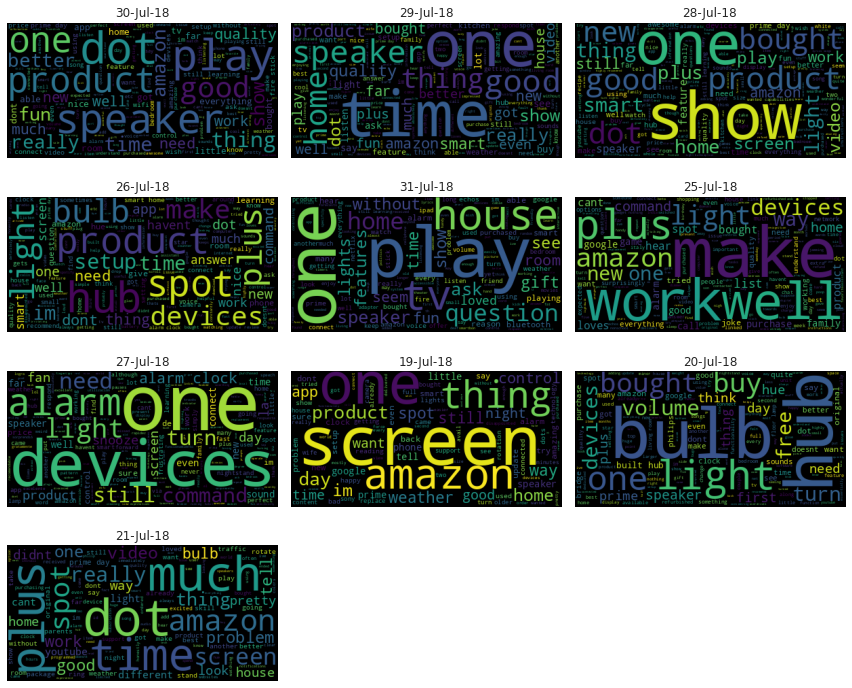

In [156]:
plt.rcParams['figure.figsize'] = (12,10)

wc = WordCloud()

index = iter(range(1, 13))

for date, text in corpus_stop.items():
    wc.generate(text)
    plt.subplot(4, 3, next(index))
    plt.title(date)
    plt.imshow(wc)
    plt.grid(False)
    plt.axis('off')
    
plt.tight_layout()
plt.show()

## sentiment analisis

In [25]:
from textblob import TextBlob
from collections import defaultdict

In [26]:
text_blob_values = defaultdict(list)
for date, text in corpus.items():
    text_blob_values['date'].append(date)
    text_blob_values['polarity'].append(TextBlob(text).polarity)
    text_blob_values['subjectivity'].append(TextBlob(text).subjectivity)


In [27]:
text_blob_values = pd.DataFrame(dict(text_blob_values))
text_blob_values.sort_values(by='date', inplace=True)
text_blob_values.index = range(0, 10)
text_blob_values

,date,polarity,subjectivity
0,19-Jul-18,0.217985,0.590532
1,20-Jul-18,0.238370,0.522331
2,21-Jul-18,0.270835,0.523364
3,25-Jul-18,0.324141,0.570355
4,26-Jul-18,0.235042,0.571212
5,27-Jul-18,0.287830,0.595118
6,28-Jul-18,0.321905,0.571178
7,29-Jul-18,0.325170,0.573343
8,30-Jul-18,0.311940,0.572562
9,31-Jul-18,0.314785,0.597924


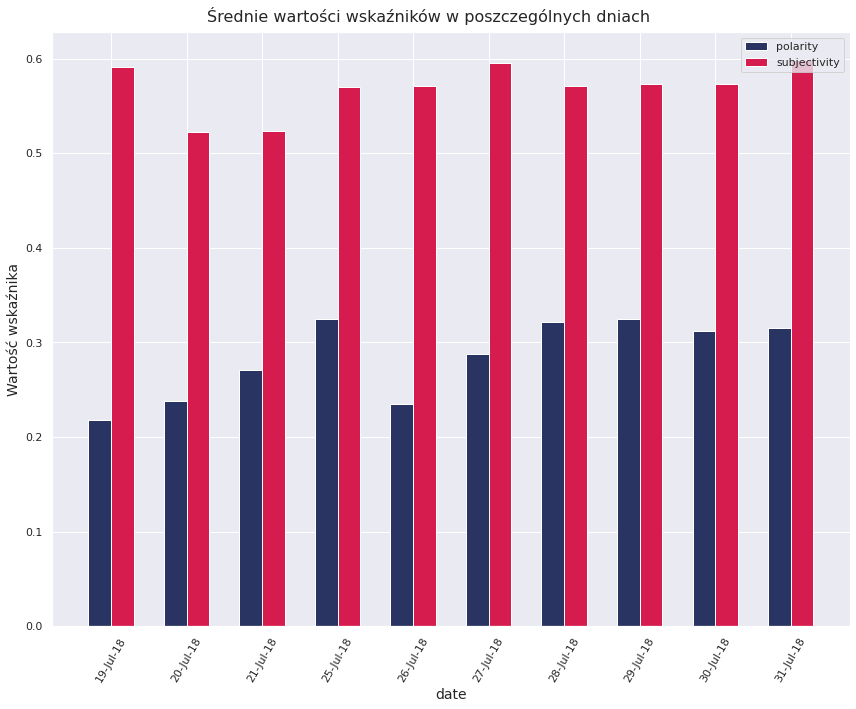

In [28]:
plt.rcParams['figure.figsize'] = [12, 10]

x = np.arange(len(text_blob_values))

fig, ax = plt.subplots()

width = 0.3

x1 = ax.bar(x - width/2, text_blob_values.polarity, width, color='#293462', label='polarity')
x2 = ax.bar(x + width/2, text_blob_values.subjectivity, width, color='#D61C4E', label='subjectivity')

ax.set_xticks(x, text_blob_values.date, rotation=60)

ax.set_xlabel("date", fontsize=14)
ax.set_ylabel("Wartość wskaźnika", fontsize=14)
plt.suptitle("Średnie wartości wskaźników w poszczególnych dniach", fontsize=16)
plt.legend()

plt.tight_layout()

plt.show()

## Detecting bad customer review

In [29]:
to_check = df[['date', 'verified_reviews']]

In [30]:
to_check['polarity'] = [round(TextBlob(x).polarity, 2) for x in to_check['verified_reviews']]

/tmp/ipykernel_3692/2699010871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_check['polarity'] = [round(TextBlob(x).polarity, 2) for x in to_check['verified_reviews']]


In [31]:
for index, review in enumerate(list(to_check[to_check['polarity'] < -0.5].verified_reviews)):
    print(f'   review {index}: ', review, end='\n')

   review 0:  The outlet does not work with it. Was disappointed in that.
   review 1:  Sad joke. Worthless.
   review 2:  The echo doesn’t come with a built in battery so it has to be plugged in at all times to use it, makes it quite inconvenient.
   review 3:  This Echo Dot is horrible. The volume on my phone is louder than than this device. My boss has one at this is not the case
   review 4:  The outlet does not work with it. Was disappointed in that.
   review 5:  Sad joke. Worthless.
   review 6:  The echo doesn’t come with a built in battery so it has to be plugged in at all times to use it, makes it quite inconvenient.
   review 7:  Would be 5 stars if you could turn off the &#34;Things to Try&#34; screen!!!  I should have read up on this before buying the Spot.  Amazon, please update to enable us to turn this off!  It is SO extremely annoying to look over to see the time but instead see &#34;Things to try&#34;.
   review 8:  Invasive and scared the crap out of me for speaking 

## text generation

In [32]:
from collections import defaultdict, Counter
import random

In [33]:
def marcov_chain(generate):
    
    x = defaultdict(list)
    words = generate.split(" ")
    while True:
        try:
            list.remove('')
        except:
            break
    
    for word, next_word in zip(words, words[1:]):
        x[word].append(next_word)
        
    x = dict(x)
    
    for to_count in x.keys():
        x[to_count] = Counter(x[to_count])
        
    return x

def generate_sentence(chain, count=20):
    
    while True:
        sentence = []
        first = random.choice(list(p.keys()))
        if first[0].isupper():
            sentence.append(first)
            break
    while len(sentence) <= count:
        l = random.choice(list(p[sentence[-1]].keys()))
        #print(p[sentence[-1]][l] / sum(p[sentence[-1]].values()))
        if (random.random() <= p[sentence[-1]][l] / sum(p[sentence[-1]].values())) or len(p[sentence[-1]])==0:
            sentence.append(l)

    return " ".join(sentence)

In [34]:
p = marcov_chain(corpus['30-Jul-18'])
for x in range(10):
    sentence = generate_sentence(p, 50)
    print(sentence, '\n')

Id wait and this Echo Show she has to listen to try itWhat I asked it now to the music to use her abilities. The only thing I haven’t heard since childhood I very beta stage still learning her library of join different than expected and understand. She works OK. This 

Right now working great and dependable. This is working after a pair I like echo thorough my nd fire stick and it is great. Easy to buying one ages ago. love listening to my husband for my phone number was on sale of fun with Alexa. The speakers to figure out 

Be carful with even easier to have not used rewards to me from Alexa. It was going to listen to it is a large Echo Plus the smart devices. It works well. Perfect for the purchase and wanted and how to own personal secretary living alone. At least thing works just 

Excelente lo unico es que estés realizando atrás vez del internet. Cheap and very  Ran into sleep sounds great. The only had in both products today and neither works. Its very good for more Sound is so 

## Topic modeling

In [35]:
from sklearn.decomposition import NMF

from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
cv = TfidfVectorizer(stop_words='english')
dtm_nmf = cv.fit_transform(data_clean.reviews)
tdm_nmf = dtm_nmf.transpose()
date = data_clean.index
words = pd.DataFrame(cv.get_feature_names_out(), columns=['word'])

In [37]:
nmf = NMF(n_components=5)

In [38]:
wynik_nmf = nmf.fit_transform(dtm_nmf)

In [39]:
nmf.components_

array([[1.43230404e-03, 7.96223996e-04, 7.96223996e-04, ...,
        1.43230404e-03, 0.00000000e+00, 2.76850039e-03],
       [8.02748621e-04, 8.68552970e-05, 8.68552970e-05, ...,
        8.02748621e-04, 0.00000000e+00, 2.04262175e-03],
       [1.43848630e-04, 5.86626302e-05, 5.86626302e-05, ...,
        1.43848630e-04, 4.60262936e-02, 4.00466122e-04],
       [1.59898793e-04, 9.10919147e-05, 9.10919147e-05, ...,
        1.59898793e-04, 0.00000000e+00, 3.11805389e-04],
       [5.63054566e-04, 8.91339537e-05, 8.91339537e-05, ...,
        5.63054566e-04, 0.00000000e+00, 1.01787616e-03]])

In [40]:
components_df = pd.DataFrame(nmf.components_, columns=words['word'])

In [41]:
components_df

word,abay,abc,abd,abilities,ability,able,abode,absolutely,ac,accent,...,youtubes,yr,yrs,yup,zero,zigbee,zonkedout,zwave,zzzzzzz,útil
0,0.001432,0.000796,0.000796,0.002389,0.011583,0.076771,0.002865,0.025961,0.003112,0.005574,...,0.002769,0.022971,0.001592,0.002769,0.001787,0.000000,0.000000,0.001432,0.000000,0.002769
1,0.000803,0.000087,0.000087,0.000261,0.024674,0.011351,0.001605,0.015516,0.001439,0.000608,...,0.002043,0.000000,0.000174,0.002043,0.008541,0.016001,0.000000,0.000803,0.000000,0.002043
2,0.000144,0.000059,0.000059,0.000176,0.000769,0.019455,0.000288,0.000086,0.000294,0.000411,...,0.000400,0.000000,0.000117,0.000400,0.000000,0.000000,0.046026,0.000144,0.046026,0.000400
3,0.000160,0.000091,0.000091,0.000273,0.002015,0.025112,0.000320,0.030462,0.000349,0.000638,...,0.000312,0.000000,0.000182,0.000312,0.001913,0.000000,0.000000,0.000160,0.000000,0.000312
4,0.000563,0.000089,0.000089,0.000267,0.003895,0.024169,0.001126,0.001655,0.001033,0.000624,...,0.001018,0.000000,0.000178,0.001018,0.001083,0.000000,0.000000,0.000563,0.000000,0.001018


In [42]:
for x in range(3):
    component = components_df.iloc[x]
    print(component.nlargest(10))

word
love       0.392505
great      0.319519
use        0.319374
like       0.300933
music      0.285023
easy       0.202665
speaker    0.172139
echo       0.163649
play       0.160290
alexa      0.155732
Name: 0, dtype: float64
word
echo     0.525852
alexa    0.346411
love     0.314533
hub      0.236714
sound    0.210859
great    0.199795
plus     0.191088
just     0.172973
dot      0.153091
bulb     0.140241
Name: 1, dtype: float64
word
love       0.215263
echo       0.196660
screen     0.190128
amazon     0.155771
great      0.145836
product    0.124138
day        0.122162
music      0.121730
im         0.111468
device     0.104586
Name: 2, dtype: float64
